In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from sentence_transformers import util
from google.colab import drive
import pickle

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
def load_pickled_embeddings(file_path="/content/drive/My Drive/Colab Notebooks/GenAi Course/saved_embeddings.pickle"):
    with open(file_path, "rb") as f:
        my_dict = pickle.load(f)
        # my_dict contains {word1: embedding1, word2: embedding2}
    return my_dict

# Load the embeddings
embeddings = load_pickled_embeddings()

<ipython-input-3-2eeeec799fdf>:3: DeprecationWarning: numpy.core.numeric is deprecated and has been renamed to numpy._core.numeric. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world usage of numpy.core is to access functionality in the public NumPy API. If that is the case, use the public NumPy API. If not, you are using NumPy internals. If you would still like to access an internal attribute, use numpy._core.numeric._frombuffer.
  my_dict = pickle.load(f)


# Exploring the embeddings

In [4]:
type(embeddings)

dict

In [5]:
embeddings.keys()

dict_keys(['man driving bike', 'man driving car', 'eating apple', 'eating orange', 'company', 'Chief executive officer', 'sad', 'happy'])

In [6]:
len(embeddings.keys())

8

In [7]:
for i in range(len(embeddings.keys())):
  print(len(list(embeddings.values())[i]))

384
384
384
384
384
384
384
384


In [8]:
# looking at the first few entries
for i, (word, vector) in enumerate(embeddings.items()):
    print(f"{word}: {vector[:5]}...")  # printing first 5 values for brevity
    if i == 2: break

man driving bike: [ 0.28955275  0.27306026 -0.8445711  -0.11371124 -0.2099431 ]...
man driving car: [-0.05505887 -0.06907044 -0.08166996  0.1883883  -0.3033152 ]...
eating apple: [ 0.7767148  -0.29832017  0.7067517   0.36721933  0.44236562]...


In [9]:

np.array(embeddings['sad'])

array([ 3.68812889e-01,  3.61887813e-01,  9.25578296e-01, -2.38791052e-02,
        2.31613040e-01, -1.32972300e-01,  6.75810575e-01,  8.22302818e-01,
        3.23434658e-02, -1.97643831e-01, -2.27262780e-01,  1.08000636e-02,
       -7.66991749e-02, -2.93822140e-01, -2.30163172e-01, -1.38257027e-01,
       -3.98908019e-01, -4.85168546e-01, -5.39750397e-01,  1.30916715e+00,
       -5.21589577e-01,  8.71008813e-01, -1.86079834e-02,  2.02380180e-01,
       -6.75668335e-03,  2.37059832e-01,  2.39203259e-01,  1.89288989e-01,
        3.44149858e-01,  5.87384701e-01,  8.19871351e-02, -6.10616088e-01,
        1.36583269e-01,  1.07891010e-02,  5.61372936e-01,  2.61368006e-01,
       -4.36712712e-01,  3.27909917e-01,  1.68980479e-01, -2.26073816e-01,
       -3.03110573e-02,  1.92853451e-01, -2.09364370e-01,  8.22575316e-02,
       -3.38835239e-01,  9.97697935e-02,  9.18629393e-02,  8.86202455e-02,
        4.58976418e-01, -1.26039088e-01, -3.68498683e-01,  1.23999029e-01,
       -1.09865703e-01, -

In [10]:
print('Minimum: ', np.array(embeddings['sad']).min(),
      '\nMaximum', np.array(embeddings['sad']).max(),
      '\nMean', np.array(embeddings['sad']).mean())

print(' ')

print('Minimum: ', np.array(embeddings['happy']).min(),
      '\nMaximum', np.array(embeddings['happy']).max(),
      '\nMean', np.array(embeddings['happy']).mean())

Minimum:  -1.1196101 
Maximum 1.777448 
Mean 0.0029293206
 
Minimum:  -1.1057698 
Maximum 1.9133428 
Mean 0.001678884


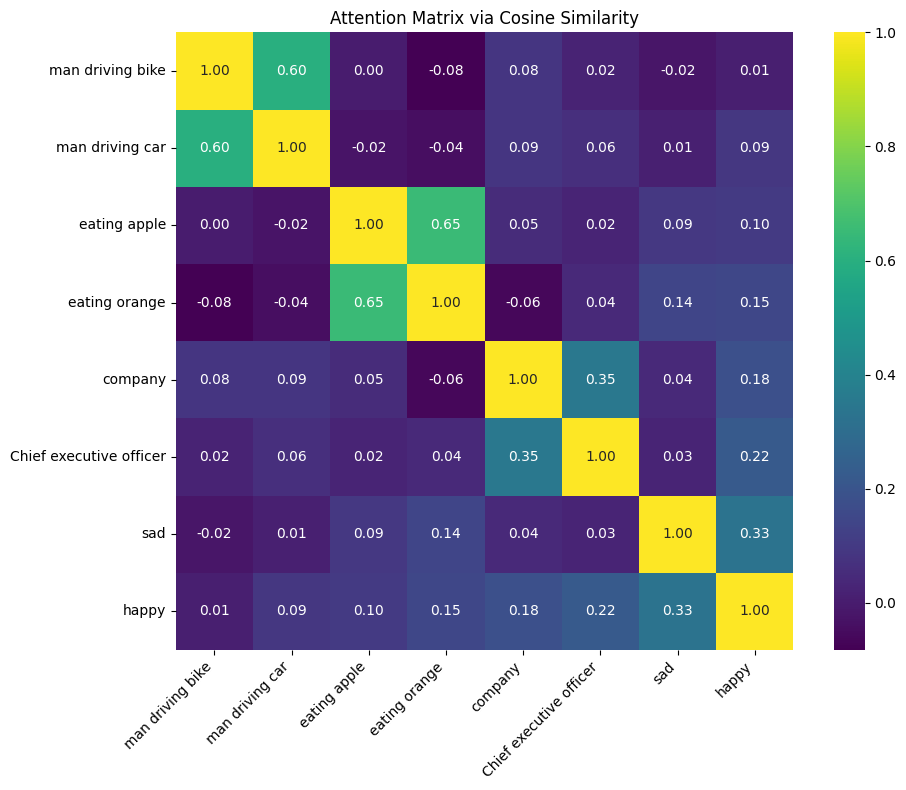

In [12]:
#getting keys and vectors at (n,384) shape
keys = list(embeddings.keys())
vectors = np.array([embeddings[key] for key in keys])  #(n, 384)

similarity_matrix = util.cos_sim(vectors, vectors).numpy()

#Plot and save heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(similarity_matrix, xticklabels=keys, yticklabels=keys,
            annot=True, fmt=".2f", cmap="viridis", square=True, cbar=True)

plt.title("Attention Matrix via Cosine Similarity")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
heatmap_path = "attention_matrix.png"
plt.savefig(heatmap_path)
plt.show()
plt.close()

In [13]:
# pip install python-docx

In [14]:
from docx import Document
from docx.shared import Inches

doc = Document()
doc.add_heading('Cosine Similarity Heatmap', level=1)
doc.add_paragraph('The matrix below shows cosine similarities between sentence embeddings as an attention-style matrix:')
doc.add_picture(heatmap_path, width=Inches(6.5))
doc.save("Attention_Matrix_Report.docx")

End